## 피마 인디언 당뇨병 예측

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

In [29]:
df =  pd.read_csv('data/pima-indians-diabetes.csv', skiprows=9, header=None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


- 데이터 전처리

In [30]:
from sklearn.preprocessing import StandardScaler
X_scaled =  StandardScaler().fit_transform(df.iloc[:,:-1].values)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(
    X_scaled, df[8].values, stratify=df[8].values, test_size=0.2, random_state=seed

)

y_train[:5]

array([0, 0, 0, 1, 0])

- 모델 정의/설정 학습 평가

In [36]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [92]:
model = Sequential([
    Dense(16, input_dim=8, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 16)                144       
                                                                 
 dropout_22 (Dropout)        (None, 16)                0         
                                                                 
 dense_63 (Dense)            (None, 32)                544       
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 dense_64 (Dense)            (None, 8)                 264       
                                                                 
 dense_65 (Dense)            (None, 1)                 9         
                                                                 
Total params: 961
Trainable params: 961
Non-trainable

- Callback 사용하지 않고 실행

In [93]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2,
                epochs=60, batch_size=32, verbose=0)
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.4500 - accuracy: 0.8052


[0.450042724609375, 0.8051947951316833]

In [94]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

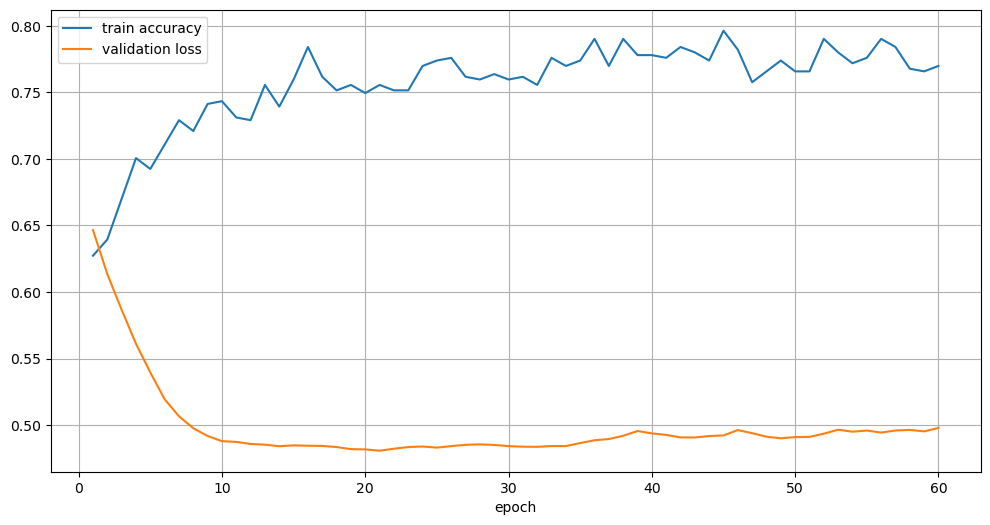

In [95]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()

- callback 사용

In [104]:
# epoch가 종료될 때 마다 callback 함수를 실행하도록 설정
model2 = Sequential([
    Dense(16, input_dim=8, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [105]:
mc = ModelCheckpoint('models/pima_best.h5', monitor='val_loss',
                     verbose=0, save_best_only=True)
# best를 찾은 뒤 10회 epoch 동안 best가 나오지 않으면, 학습을 강제 종료함
es = EarlyStopping(monitor='val_loss', patience=10) 

In [106]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                 epochs=200, batch_size=128, verbose=0,
                 callbacks=[mc, es])

In [107]:
best_model = load_model('models/pima_best.h5')
best_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 12ms/step - loss: 0.4774 - accuracy: 0.7922


[0.47740837931632996, 0.7922077775001526]

In [108]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

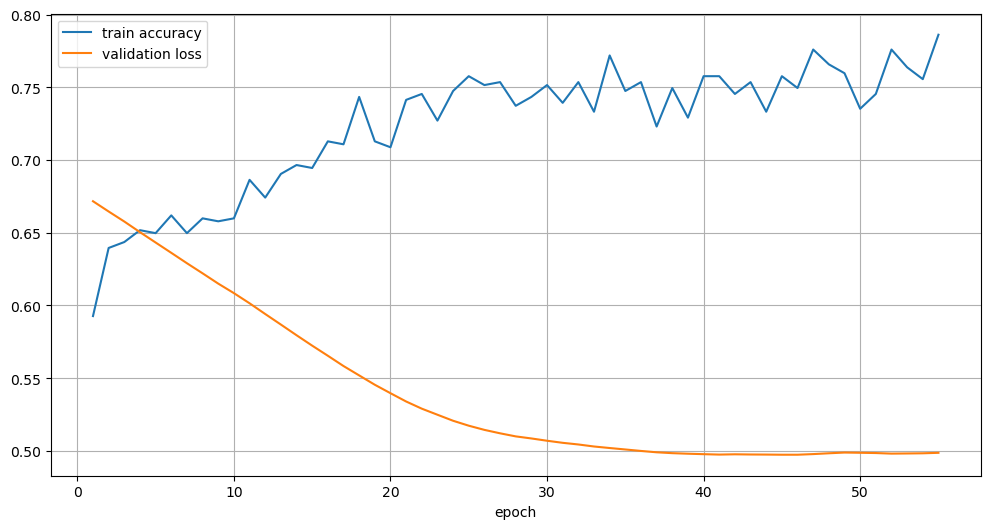

In [109]:
plt.figure(figsize=(12,6))
plt.plot(xs2, y_acc2, label='train accuracy')
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()